# 第11章 时间序列

__时间序列__(time series)数据是一种__重要__的__结构化数据__形式，应用于__多个领域__，包括金融学、经济学、生态学、神经科学、物理学等。在__多个时间点__观察或测量到的__任何事物__都可以形成__一段时间序列__。

__很多 时间序列__是__固定频率__的，也就是说，__数据点__是根据__某种规律 定期出现__的(比如每 15 秒、每 5 分钟、每月出现一次)。

时间序列也可以是__不定期__的，__没有固定__的__时间单位__或__单位之间的 偏移量__。

时间序列数据的__意义__取决于具体的__应用场景__，主要有以下__几种__：
- __时间戳__(timestamp)，特定的时刻。
- __固定时期__(period)，如2007年1月或2010年全年。
- __时间间隔__(interval)，由起始和结束__时间戳__表示。__时期__(period)可以被看做__间隔__(interval)的__特例__。
- __实验或过程时间__，__每个时间点__都是__相对于 特定起始时间__的一个__度量__。例如，从放入烤箱时起，每秒钟饼干的直径。

__本章__主要讲解__前3种__时间序列。__许多技术__都可用于处理__实验型 时间序列__，其__索引__可能是一个__整数或浮点数__(表示从__实验开始算起__已经过去的时间)。

__最简单__也__最常见__的__时间序列__都是用__时间戳 进行 索引__的。

提示：__pandas__也支持__基于timedeltas的 指数__，它可以__有效代表 实验或经过的 时间__。这本书不涉及timedelta指数，但你可以学习__pandas的文档__(http://pandas.pydata.org/)。

__pandas__提供了许多__内置__的__时间序列处理工具和数据算法__。因此，你可以__高效处理__非常大的时间序列，轻松地进行__切片/切块、聚合、对定期/不定期的时间序列进行重采样__等。

__有些工具__特别适合__金融和经济应用__，你当然也可以用__它们__来__分析 服务器日志数据__。

# 1.日期和时间数据类型及工具

__Python标准库__包含用于__日期__(date)和__时间__(time)__数据__的__数据类型__，而且还有__日历方面__的__功能__。

我们主要会用到__datetime、time以及calendar模块__。__datetime.datetime__(也可以简写为datetime)是__用得最多__的__数据类型__：

In [6]:
import numpy as np
import pandas as pd
from datetime import datetime

In [3]:
now = datetime.now()
now

datetime.datetime(2019, 7, 17, 17, 13, 11, 224653)

In [7]:
now.year, now.month, now.day

(2019, 7, 17)

- __datetime__以__毫秒形式 存储 日期和时间__。

- __timedelta__表示__两个datetime对象__之间的__时间差__：

In [8]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [9]:
delta.days

926

In [10]:
delta.seconds

56700

- 可以给__datetime对象 加上(或减去) 一个或多个timedelta__，这样会产生一个__新对象__：

In [11]:
from datetime import timedelta

In [12]:
start = datetime(2011, 1, 7)

In [13]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [14]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

__datetime模块__中的__数据类型__参见__表10-1__。

虽然本章主要讲的是__pandas数据类型 和 高级时间序列处理__，但你肯定会在Python的__其他地方__遇到__有关datetime的 数据类型__。
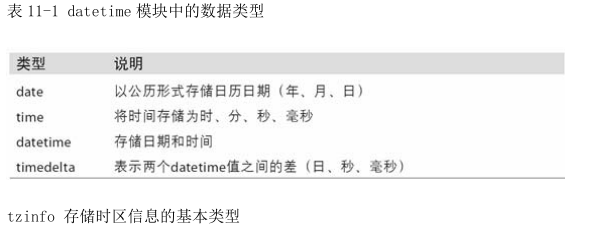

## 1.1 字符串和datetime的相互转换

### 1.1.1 datetime对象转字符串

- 利用__str或strftime方法__(传入一个__格式化字符串__)，__datetime对象__和__pandas的 Timestamp对象__(稍后就会介绍)可以被__格式化__为__字符串__：

In [15]:
stamp = datetime(2011, 1, 3)

In [16]:
str(stamp)

'2011-01-03 00:00:00'

In [18]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

表11-2列出了全部的__格式化编码__。
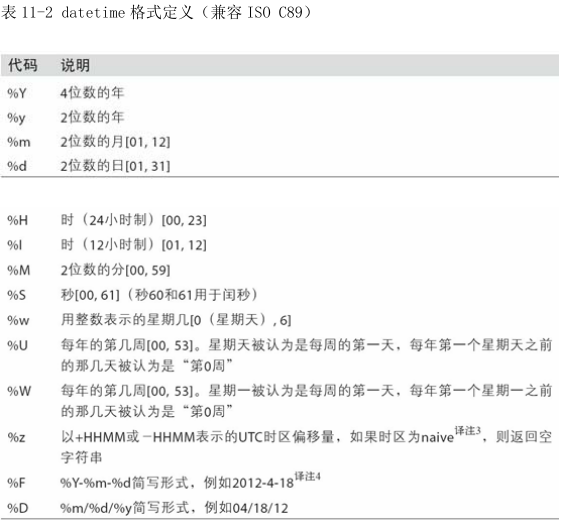

### 1.1.2 字符串转datetime对象(3种方法)

- 1.1.2.1 __datetime.strptime__可以用这些__格式化编码__将__字符串__转换为__日期__：

In [19]:
value = '2011-01-03'
value

'2011-01-03'

In [21]:
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [22]:
datestrs = ['7/6/2011', '8/6/2011']

In [23]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

- __datetime.strptime__是通过__已知格式__进行__日期解析__的__最佳方式__。

但是__每次都要 编写 格式定义__是__很麻烦__的事情，尤其是对于一些__常见__的__日期格式__。这种情况下，
- 1.1.2.2 你可以用__dateutil__这个第三方包中的__parser.parse方法__(__pandas__中已经自动__安装__好了)：

In [25]:
from dateutil.parser import parse

In [26]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

__dateutil__可以__解析 几乎所有__人类能够理解的 __日期 表示形式__：

In [27]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

在__国际通用__的__格式__中，日出现在月的前面很普遍，传入__dayfirst=True__即可__解决__这个问题：

In [28]:
parse('6/12/2011')

datetime.datetime(2011, 6, 12, 0, 0)

In [29]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

__pandas__通常是用于__处理 成组日期__的，不管__这些日期 是 DataFrame的轴索引 还是 列__。
- 1.2.2.3 __to_datetime方法__可以__解析 多种不同的 日期表示形式__。对__标准日期格式__(如ISO8601)的解析非常快：

In [32]:
import pandas as pd

In [30]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [33]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

- 它还可以__处理 缺失值__(__None__、__空字符串__等)：

In [36]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [37]:
idx[2]

NaT

In [38]:
pd.isnull(idx)

array([False, False,  True])

__NaT__(Not a Time)是__pandas__中__时间戳数据的 null值__。

注意：__dateutil.parser__是一个__实用但不完美__的工具。比如说，它会把一些__原本不是日期的 字符串__认作是__日期__(比如"42"会被解析为2042年的今天)。

__datetime对象__还有一些__特定于当前环境__(位于不同国家或使用不同语言的系统)的__格式化选项__。例如，__德语或法语系统__所用的月份简写就与__英语系统__所用的不同。表11-3进行了总结。
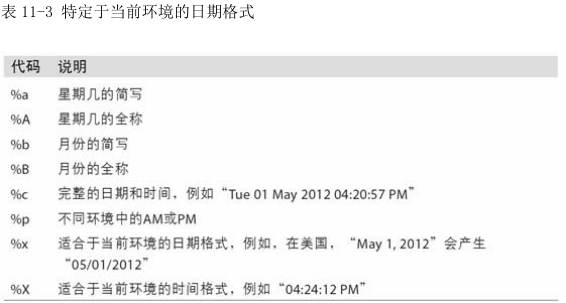

# 2.时间序列基础

__pandas 最基本的 时间序列类型__就是__以 时间戳__(通常以__Python字符串__或__datatime对象__表示)__为 索引__的__Series__：

In [41]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), 
         datetime(2011, 1, 7), datetime(2011, 1, 8), 
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [42]:
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.412841
2011-01-05    0.457813
2011-01-07   -1.159784
2011-01-08   -0.389771
2011-01-10   -0.370227
2011-01-12   -0.056844
dtype: float64

这些__datetime对象__实际上是被放在一个__DatetimeIndex__中的：

In [43]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

- 跟__其他Series__一样，__不同索引的 时间序列__之间的__算术运算__会__自动 按日期 对齐__：

In [44]:
ts + ts[::2]

2011-01-02   -0.825682
2011-01-05         NaN
2011-01-07   -2.319568
2011-01-08         NaN
2011-01-10   -0.740455
2011-01-12         NaN
dtype: float64

ts[::2]是__每隔两个__取一个。

- __pandas__用__NumPy的 datetime64数据类型__以__纳秒__形式__存储 时间戳__：

In [46]:
ts.index.dtype

dtype('<M8[ns]')

- __DatetimeIndex__中的__各个标量值__是__pandas的 Timestamp对象__：

In [47]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

只要__有需要__，__TimeStamp__可以__随时自动转换__为__datetime对象__。

此外，它还可以存储__频率信息__(__如果有__的话)，且知道如何执行__时区转换__以及__其他操作__。稍后将对此进行__详细讲解__。

## 2.1 索引、选取、子集构造

- 当你根据__标签索引 选取数据__时，__时间序列__和其它的___pandas.Series 很像__：

In [49]:
stamp = ts.index[2]
ts[stamp]

-1.1597841902284465

- 还有一种__更为方便__的__用法__：传入一个__可以 被解释为日期的 字符串__：

In [50]:
ts['1/10/2011']

-0.37022746595653355

In [51]:
ts['20110110']

-0.37022746595653355

- 对于__较长的 时间序列__，只需传入__“年”或“年月”__即可轻松选取__数据__的__切片__：

In [52]:
longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000',periods=1000))
longer_ts

2000-01-01   -0.969476
2000-01-02   -0.721313
2000-01-03    0.320368
2000-01-04   -1.252621
2000-01-05    1.549757
2000-01-06   -0.254931
2000-01-07   -0.039435
2000-01-08   -1.187791
2000-01-09    0.302392
2000-01-10    0.339122
2000-01-11    1.330314
2000-01-12   -1.787016
2000-01-13   -0.018009
2000-01-14    1.264645
2000-01-15    0.480808
2000-01-16    0.103262
2000-01-17   -0.770667
2000-01-18   -0.458949
2000-01-19   -2.864456
2000-01-20   -0.082461
2000-01-21   -0.403243
2000-01-22    0.230570
2000-01-23   -0.266388
2000-01-24    2.024305
2000-01-25    1.305127
2000-01-26   -2.827415
2000-01-27   -0.739832
2000-01-28    0.158247
2000-01-29    0.008065
2000-01-30    0.256208
                ...   
2002-08-28   -1.201016
2002-08-29   -0.224206
2002-08-30    1.079870
2002-08-31   -1.142943
2002-09-01    1.261880
2002-09-02    0.794674
2002-09-03   -0.450099
2002-09-04   -0.090776
2002-09-05    0.598339
2002-09-06   -1.306275
2002-09-07   -0.482464
2002-09-08    1.033492
2002-09-09 

In [53]:
longer_ts['2001']

2001-01-01    0.145550
2001-01-02    0.812589
2001-01-03   -1.169004
2001-01-04    0.092746
2001-01-05    1.031317
2001-01-06    0.090353
2001-01-07   -0.075556
2001-01-08    0.825888
2001-01-09    0.159576
2001-01-10   -1.325492
2001-01-11    3.902223
2001-01-12   -1.063493
2001-01-13   -0.784561
2001-01-14    0.065989
2001-01-15   -0.478651
2001-01-16   -0.024289
2001-01-17    1.443719
2001-01-18    0.353022
2001-01-19    0.064864
2001-01-20   -0.709182
2001-01-21   -0.608481
2001-01-22   -1.090855
2001-01-23   -3.236297
2001-01-24   -0.601386
2001-01-25   -0.971525
2001-01-26    1.292993
2001-01-27    0.983618
2001-01-28   -0.557931
2001-01-29    0.566419
2001-01-30    1.319575
                ...   
2001-12-02    0.259577
2001-12-03   -2.009284
2001-12-04    0.806224
2001-12-05    1.321392
2001-12-06   -1.667107
2001-12-07    0.514750
2001-12-08   -1.557027
2001-12-09   -0.916110
2001-12-10   -0.952961
2001-12-11   -1.334847
2001-12-12   -1.590672
2001-12-13   -0.278861
2001-12-14 

这里，__字符串 “2001”__被解释成__年__，并根据它选取**时间区间**。
- 指定__月__也同样奏效：

In [54]:
longer_ts['2001-05']

2001-05-01    0.927339
2001-05-02    0.921310
2001-05-03   -1.828057
2001-05-04   -1.772493
2001-05-05   -0.371260
2001-05-06   -0.274927
2001-05-07    0.854462
2001-05-08   -1.012674
2001-05-09    0.549953
2001-05-10   -0.357667
2001-05-11   -0.085818
2001-05-12   -0.491463
2001-05-13    3.523229
2001-05-14    0.362995
2001-05-15    0.739362
2001-05-16    0.146267
2001-05-17    0.216820
2001-05-18   -0.651099
2001-05-19    0.029602
2001-05-20   -1.039681
2001-05-21    0.793045
2001-05-22    0.111016
2001-05-23   -1.713954
2001-05-24   -1.066012
2001-05-25    1.552948
2001-05-26    1.241133
2001-05-27    2.233989
2001-05-28   -0.181641
2001-05-29    2.697607
2001-05-30    0.262082
2001-05-31   -1.474260
Freq: D, dtype: float64

- __datetime对象__也可以进行__切片__：

In [56]:
ts[datetime(2011, 1, 7):]

2011-01-07   -1.159784
2011-01-08   -0.389771
2011-01-10   -0.370227
2011-01-12   -0.056844
dtype: float64

- 由于__大部分 时间序列数据__都是按照__时间先后__排序的，因此你也可以用__不存在于 该时间序列__中的__时间戳__对其进行__切片__(即__范围查询__)：

In [57]:
ts

2011-01-02   -0.412841
2011-01-05    0.457813
2011-01-07   -1.159784
2011-01-08   -0.389771
2011-01-10   -0.370227
2011-01-12   -0.056844
dtype: float64

In [58]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -1.159784
2011-01-08   -0.389771
2011-01-10   -0.370227
dtype: float64

跟之前一样，你可以传入__字符串日期、datetime或Timestamp__。注意，__这样切片__所产生的是__源时间序列的 视图__，跟__NumPy数组的 切片运算__是__一样__的。

这意味着，__没有数据 被复制__，对__切片__进行__修改 会反映到 原始数据__上。

- 此外，还有一个__等价的 实例方法__也可以__截取 两个日期之间 TimeSeries__：

In [59]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.412841
2011-01-05    0.457813
2011-01-07   -1.159784
2011-01-08   -0.389771
dtype: float64

- 上面这些操作对__DataFrame 也有效__。例如，对__DataFrame__的__行__进行**索引**：

In [60]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [61]:
long_df = pd.DataFrame(np.random.randn(100,4),
                      index=dates,
                      columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.859724,-0.019972,1.167491,2.093526
2000-01-12,0.524709,0.586023,0.286124,-0.848205
2000-01-19,0.269896,1.430050,-1.429347,-1.851064
2000-01-26,1.266139,1.514520,1.377614,1.424700
2000-02-02,2.171803,-0.798306,-0.759247,-0.608414
2000-02-09,-0.205127,-0.330219,-0.132792,0.724161
2000-02-16,0.698465,-0.035988,-0.704575,0.329244
2000-02-23,-0.348583,0.550450,-0.827381,-0.648624
2000-03-01,-0.963767,0.017729,-1.281524,-1.072127
2000-03-08,0.627488,-0.487409,-0.857737,1.335145


In [62]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.212991,-0.414317,0.565368,-0.621709
2001-05-09,-0.095746,-0.462272,0.206828,0.244419
2001-05-16,1.281206,-1.345347,0.296104,1.083945
2001-05-23,-2.548069,0.951703,-0.276467,1.305757
2001-05-30,0.679958,0.446058,0.081728,-0.201029


## 2.2 带有重复索引的时间序列

在__某些应用场景__中，可能会存在__多个观测数据__落在__同一个时间点__上的情况。下面就是一个例子：

In [63]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])

In [64]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

- 通过检查__索引的 is_unique属性__，我们就可以知道它是不是唯一的：

In [65]:
dup_ts.index.is_unique

False

对__这个时间序列__进行__索引__，要么产生__标量值__，要么产生__切片__，具体要看__所选的 时间点 是否重复__：

In [66]:
dup_ts['1/3/2000'] # not duplicated

4

In [67]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

- 假设你想要对具有__非唯一时间戳__的__数据__进行__聚合__。一个办法是使用__groupby__，并传入__level=0__：

In [68]:
grouped = dup_ts.groupby(level=0)

In [69]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [70]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 3.日期的范围、频率以及移动

pandas中的原生时间序列一般被认为是不规则的，也就是说，它们没有固定的频率。对于大部分应用程序而言，这是无所谓的。但是，它常常需要以某种相对固定的频率进行分析，比如每日、每月、每 15 分钟等（这样自然会在时间序列中引入缺失值）。幸运的是，pandas 有一整套标准时间序列频率以及用于重采样、频率推断、生成固定频率日期范围的工具。

例如，我们可以将之前那个时间序列转换为一个具有固定频率（每日）的时间序列，只需调用 resample 即可：

In [71]:
ts

2011-01-02   -0.412841
2011-01-05    0.457813
2011-01-07   -1.159784
2011-01-08   -0.389771
2011-01-10   -0.370227
2011-01-12   -0.056844
dtype: float64

In [73]:
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

字符串“D”是每天的意思。

频率的转换（或重采样）是一个比较大的主题，稍后将专门用一节来进行讨论（11.6 小节）。这里，将告诉你如何使用基本的频率和它的倍数。

## 3.1 生成日期范围

虽然之前用的时候没有明说，但你可能已经猜到 pandas.date_range 可用于根据指定的频率生成指定长度的 DatetimeIndex：

In [74]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

默认情况下，date_range会产生按天计算的时间点。如果只传入起始或结束日期，那就还得传入一个表示一段时间的数字：

In [75]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [76]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

起始和结束日期定义了日期索引的严格边界。例如，如果你想要生成一个由每月最后一个工作日组成的日期索引，可以传入"BM"频率（表示 business end 
of month，表 11-4 是频率列表），这样就只会包含时间间隔内（或刚好在边界上的）符合频率要求的日期：

In [77]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

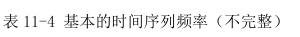

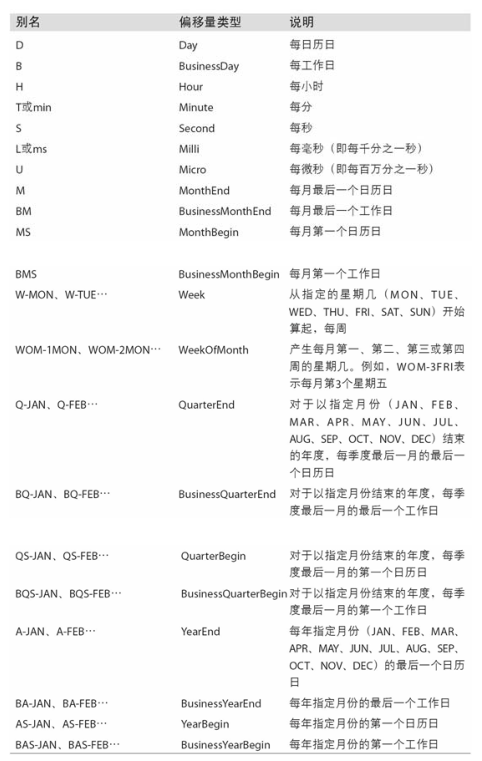

date_range 默认会保留起始和结束时间戳的时间信息（如果有的话）：

In [78]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

有时，虽然起始和结束日期带有时间信息，但你希望产生一组被规范化（normalize）到午夜的时间戳。normalize 选项即可实现该功能：

In [80]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 3.2 频率和日期偏移量

pandas 中的频率是由一个基础频率（base frequency）和一个乘数组成的。基础频率通常以一个字符串别名表示，比如"M"表示每月，"H"表示每小时。对于
每个基础频率，都有一个被称为日期偏移量（date offset）的对象与之对应。

例如，按小时计算的频率可以用 Hour 类表示：

In [81]:
from pandas.tseries.offsets import Hour, Minute

In [82]:
hour = Hour()

hour

<Hour>

传入一个整数即可定义偏移量的倍数：

In [83]:
four_hours = Hour(4)

four_hours

<4 * Hours>

一般来说，无需明确创建这样的对象，只需使用诸如"H"或"4H"这样的字符串别名即可。在基础频率前面放上一个整数即可创建倍数：

In [84]:
pd.date_range('2000-01-01', '2001-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               ...
               '2001-01-02 08:00:00', '2001-01-02 12:00:00',
               '2001-01-02 16:00:00', '2001-01-02 20:00:00',
               '2001-01-03 00:00:00', '2001-01-03 04:00:00',
               '2001-01-03 08:00:00', '2001-01-03 12:00:00',
               '2001-01-03 16:00:00', '2001-01-03 20:00:00'],
              dtype='datetime64[ns]', length=2214, freq='4H')

大部分偏移量对象都可通过加法进行连接：

In [85]:
Hour(2) + Minute(30)

<150 * Minutes>

同理，你也可以传入频率字符串（如"2h30min"），这种字符串可以被高效地解析为等效的表达式：

In [86]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

有些频率所描述的时间点并不是均匀分隔的。例如，"M"（日历月末）和"BM"（每月最后一个工作日）就取决于每月的天数，对于后者，还要考虑月末是不是周末。由于没有更好的术语，我将这些称为锚点偏移量（anchored offset）。

表 11-4 列出了 pandas 中的频率代码和日期偏移量类。

笔记：用户可以根据实际需求自定义一些频率类以便提供 pandas 所没有的日期逻辑，但具体的细节超出了本书的范围。

表 11-4 时间序列的基础频率

## 3.3 WOM 日期

WOM（Week Of Month）是一种非常实用的频率类，它以 WOM 开头。它使你能获得诸如“每月第 3 个星期五”之类的日期：

In [87]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [88]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

## 3.4 移动（超前和滞后）数据

移动（shifting）指的是沿着时间轴将数据前移或后移。Series 和 DataFrame都有一个 shift 方法用于执行单纯的前移或后移操作，保持索引不变：

In [89]:
ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.671563
2000-02-29    0.904383
2000-03-31   -0.756253
2000-04-30   -0.407380
Freq: M, dtype: float64

In [90]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.671563
2000-04-30    0.904383
Freq: M, dtype: float64

In [91]:
ts.shift(-2)

2000-01-31   -0.756253
2000-02-29   -0.407380
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

当我们这样进行移动时，就会在时间序列的前面或后面产生缺失数据。

shift 通常用于计算一个时间序列或多个时间序列（如 DataFrame 的列）中的百分比变化。可以这样表达：

In [94]:
ts / ts.shift(1) -1

2000-01-31         NaN
2000-02-29    0.346684
2000-03-31   -1.836209
2000-04-30   -0.461318
Freq: M, dtype: float64

由于单纯的移位操作不会修改索引，所以部分数据会被丢弃。因此，如果频率已知，则可以将其传给 shift 以便实现对时间戳进行位移而不是对数据进行简单位移：

In [96]:
ts

2000-01-31    0.671563
2000-02-29    0.904383
2000-03-31   -0.756253
2000-04-30   -0.407380
Freq: M, dtype: float64

In [95]:
ts.shift(2, freq='M')

2000-03-31    0.671563
2000-04-30    0.904383
2000-05-31   -0.756253
2000-06-30   -0.407380
Freq: M, dtype: float64

这里还可以使用其他频率，于是你就能非常灵活地对数据进行超前和滞后处理了：

In [97]:
ts.shift(3, 'D')

2000-02-03    0.671563
2000-03-03    0.904383
2000-04-03   -0.756253
2000-05-03   -0.407380
dtype: float64

In [98]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.671563
2000-02-29 01:30:00    0.904383
2000-03-31 01:30:00   -0.756253
2000-04-30 01:30:00   -0.407380
Freq: M, dtype: float64

## 3.5 通过偏移量对日期进行位移

pandas 的日期偏移量还可以用在 datetime 或 Timestamp 对象上：

In [99]:
from pandas.tseries.offsets import Day, MonthEnd

In [100]:
now = datetime(2011, 11, 17)

now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

如果加的是锚点偏移量（比如 MonthEnd），第一次增量会将原日期向前滚动到符合频率规则的下一个日期：

In [101]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

通过锚点偏移量的 rollforward 和 rollback 方法，可明确地将日期向前或向后“滚动”：

In [102]:
offset = MonthEnd()

In [103]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [104]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

日期偏移量还有一个巧妙的用法，即结合 groupby 使用这两个“滚动”方法：

In [105]:
ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.724113
2000-01-19    1.417582
2000-01-23    1.754176
2000-01-27   -0.076986
2000-01-31    0.241783
2000-02-04    1.111248
2000-02-08   -0.919642
2000-02-12   -1.614010
2000-02-16    1.143283
2000-02-20    2.405906
2000-02-24   -0.899841
2000-02-28    0.866544
2000-03-03   -0.217850
2000-03-07    1.322708
2000-03-11    0.234649
2000-03-15   -0.548884
2000-03-19   -0.881872
2000-03-23    1.172597
2000-03-27    1.900383
2000-03-31    0.370813
Freq: 4D, dtype: float64

In [107]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.522488
2000-02-29    0.299070
2000-03-31    0.419068
dtype: float64

当然，更简单、更快速地实现该功能的办法是使用 resample（11.6 小节将对此进行详细介绍）：

In [109]:
ts.resample('M').mean()

2000-01-31    0.522488
2000-02-29    0.299070
2000-03-31    0.419068
Freq: M, dtype: float64

# 4.时区处理

时间序列处理工作中最让人不爽的就是对时区的处理。许多人都选择以协调世
界时（UTC，它是格林尼治标准时间（Greenwich Mean Time）的接替者，目前
已经是国际标准了）来处理时间序列。时区是以 UTC 偏移量的形式表示的。例
如，夏令时期间，纽约比 UTC 慢 4 小时，而在全年其他时间则比 UTC 慢 5 小
时。

在 Python 中，时区信息来自第三方库 pytz，它使 Python 可以使用 Olson 数据
库（汇编了世界时区信息）。这对历史数据非常重要，这是因为由于各地政府
的各种突发奇想，夏令时转变日期（甚至 UTC 偏移量）已经发生过多次改变
了。就拿美国来说，DST 转变时间自 1900 年以来就改变过多次！ 
有关 pytz 库的更多信息，请查阅其文档。就本书而言，由于 pandas 包装了
pytz 的功能，因此你可以不用记忆其 API，只要记得时区的名称即可。时区名
可以在 shell 中看到，也可以通过文档查看：

In [1]:
import pytz

In [2]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [4]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [7]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [8]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -1.040540
2012-03-10 09:30:00    0.215767
2012-03-11 09:30:00   -0.903192
2012-03-12 09:30:00   -1.625480
2012-03-13 09:30:00   -1.518453
2012-03-14 09:30:00   -0.064202
Freq: D, dtype: float64

In [9]:
print(ts.index.tz)

None


In [11]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [12]:
ts

2012-03-09 09:30:00   -1.040540
2012-03-10 09:30:00    0.215767
2012-03-11 09:30:00   -0.903192
2012-03-12 09:30:00   -1.625480
2012-03-13 09:30:00   -1.518453
2012-03-14 09:30:00   -0.064202
Freq: D, dtype: float64

In [13]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -1.040540
2012-03-10 09:30:00+00:00    0.215767
2012-03-11 09:30:00+00:00   -0.903192
2012-03-12 09:30:00+00:00   -1.625480
2012-03-13 09:30:00+00:00   -1.518453
2012-03-14 09:30:00+00:00   -0.064202
Freq: D, dtype: float64

In [14]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

# 5.时期及其算术运算

In [16]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [17]:
p + 5

Period('2012', 'A-DEC')

In [18]:
p - 2

Period('2005', 'A-DEC')

In [19]:
pd.Period('2014', freq='A-DEC') - p

7

In [20]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [21]:
pd.Series(np.random.randn(6), index=rng)

2000-01    2.304730
2000-02   -0.049335
2000-03    1.115982
2000-04   -0.877197
2000-05   -1.079866
2000-06    0.916610
Freq: M, dtype: float64

In [22]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [23]:
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [24]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [25]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [26]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [27]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [28]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [29]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [30]:
p = pd.Period('Aug-2007', 'M')

In [31]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [33]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]', freq='A-DEC')

In [34]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.266869
2007   -0.090189
2008   -1.702224
2009   -0.491605
Freq: A-DEC, dtype: float64

In [35]:
ts.asfreq('M', how='start')

2006-01    0.266869
2007-01   -0.090189
2008-01   -1.702224
2009-01   -0.491605
Freq: M, dtype: float64

In [36]:
ts.asfreq('B', how='end')

2006-12-29    0.266869
2007-12-31   -0.090189
2008-12-31   -1.702224
2009-12-31   -0.491605
Freq: B, dtype: float64

In [38]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [39]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [40]:
 p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [41]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [42]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [43]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [45]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[T]', freq='T')

In [46]:
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

In [48]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -0.142606
2000-02-29   -2.215753
2000-03-31   -1.178876
Freq: M, dtype: float64

In [49]:
pts = ts.to_period()
pts

2000-01   -0.142606
2000-02   -2.215753
2000-03   -1.178876
Freq: M, dtype: float64

In [50]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -1.121311
2000-01-30   -0.781785
2000-01-31   -1.342576
2000-02-01    0.466385
2000-02-02    1.015655
2000-02-03    0.305083
Freq: D, dtype: float64

In [51]:
ts2.to_period('M')

2000-01   -1.121311
2000-01   -0.781785
2000-01   -1.342576
2000-02    0.466385
2000-02    1.015655
2000-02    0.305083
Freq: M, dtype: float64

In [53]:
pts = ts2.to_period()
pts

2000-01-29   -1.121311
2000-01-30   -0.781785
2000-01-31   -1.342576
2000-02-01    0.466385
2000-02-02    1.015655
2000-02-03    0.305083
Freq: D, dtype: float64

In [54]:
pts.to_timestamp(how='end')

2000-01-29   -1.121311
2000-01-30   -0.781785
2000-01-31   -1.342576
2000-02-01    0.466385
2000-02-02    1.015655
2000-02-03    0.305083
Freq: D, dtype: float64

In [55]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [56]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [57]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [58]:
index = pd.PeriodIndex(year=data.year, 
                       quarter=data.quarter, 
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [59]:
data.index = index

In [60]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 6.重采样及频率转换

In [61]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    1.843122
2000-01-02   -0.132519
2000-01-03   -0.160909
2000-01-04   -2.604629
2000-01-05    0.426730
2000-01-06    1.232856
2000-01-07    0.343179
2000-01-08    0.184794
2000-01-09    1.343810
2000-01-10    0.031970
2000-01-11   -0.778381
2000-01-12    0.961210
2000-01-13   -1.258488
2000-01-14   -0.052997
2000-01-15   -1.016458
2000-01-16   -0.540426
2000-01-17    0.075631
2000-01-18    0.260105
2000-01-19    0.467844
2000-01-20    0.082627
2000-01-21    0.107108
2000-01-22   -0.227093
2000-01-23    1.330970
2000-01-24   -0.734630
2000-01-25   -1.873450
2000-01-26   -0.565977
2000-01-27   -2.218057
2000-01-28    0.345093
2000-01-29   -1.573186
2000-01-30   -0.382379
                ...   
2000-03-11   -0.321343
2000-03-12   -0.208799
2000-03-13   -0.139908
2000-03-14   -1.151858
2000-03-15   -0.868303
2000-03-16   -0.303196
2000-03-17   -1.356087
2000-03-18   -0.886220
2000-03-19    0.878178
2000-03-20    0.141364
2000-03-21   -0.596968
2000-03-22    0.122377
2000-03-23 

In [62]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00    1.843122
2000-01-01 00:00:00    0.000000
2000-01-01 00:05:00    0.000000
2000-01-01 00:10:00    0.000000
2000-01-01 00:15:00    0.000000
2000-01-01 00:20:00    0.000000
2000-01-01 00:25:00    0.000000
2000-01-01 00:30:00    0.000000
2000-01-01 00:35:00    0.000000
2000-01-01 00:40:00    0.000000
2000-01-01 00:45:00    0.000000
2000-01-01 00:50:00    0.000000
2000-01-01 00:55:00    0.000000
2000-01-01 01:00:00    0.000000
2000-01-01 01:05:00    0.000000
2000-01-01 01:10:00    0.000000
2000-01-01 01:15:00    0.000000
2000-01-01 01:20:00    0.000000
2000-01-01 01:25:00    0.000000
2000-01-01 01:30:00    0.000000
2000-01-01 01:35:00    0.000000
2000-01-01 01:40:00    0.000000
2000-01-01 01:45:00    0.000000
2000-01-01 01:50:00    0.000000
2000-01-01 01:55:00    0.000000
2000-01-01 02:00:00    0.000000
2000-01-01 02:05:00    0.000000
2000-01-01 02:10:00    0.000000
2000-01-01 02:15:00    0.000000
2000-01-01 02:20:00    0.000000
                         ...   
2000-04-

In [63]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00    1.843122
2000-01-01 00:05:00    0.000000
2000-01-01 00:10:00    0.000000
2000-01-01 00:15:00    0.000000
2000-01-01 00:20:00    0.000000
2000-01-01 00:25:00    0.000000
2000-01-01 00:30:00    0.000000
2000-01-01 00:35:00    0.000000
2000-01-01 00:40:00    0.000000
2000-01-01 00:45:00    0.000000
2000-01-01 00:50:00    0.000000
2000-01-01 00:55:00    0.000000
2000-01-01 01:00:00    0.000000
2000-01-01 01:05:00    0.000000
2000-01-01 01:10:00    0.000000
2000-01-01 01:15:00    0.000000
2000-01-01 01:20:00    0.000000
2000-01-01 01:25:00    0.000000
2000-01-01 01:30:00    0.000000
2000-01-01 01:35:00    0.000000
2000-01-01 01:40:00    0.000000
2000-01-01 01:45:00    0.000000
2000-01-01 01:50:00    0.000000
2000-01-01 01:55:00    0.000000
2000-01-01 02:00:00    0.000000
2000-01-01 02:05:00    0.000000
2000-01-01 02:10:00    0.000000
2000-01-01 02:15:00    0.000000
2000-01-01 02:20:00    0.000000
2000-01-01 02:25:00    0.000000
                         ...   
2000-04-

In [64]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59    1.843122
2000-01-01 00:04:59    0.000000
2000-01-01 00:09:59    0.000000
2000-01-01 00:14:59    0.000000
2000-01-01 00:19:59    0.000000
2000-01-01 00:24:59    0.000000
2000-01-01 00:29:59    0.000000
2000-01-01 00:34:59    0.000000
2000-01-01 00:39:59    0.000000
2000-01-01 00:44:59    0.000000
2000-01-01 00:49:59    0.000000
2000-01-01 00:54:59    0.000000
2000-01-01 00:59:59    0.000000
2000-01-01 01:04:59    0.000000
2000-01-01 01:09:59    0.000000
2000-01-01 01:14:59    0.000000
2000-01-01 01:19:59    0.000000
2000-01-01 01:24:59    0.000000
2000-01-01 01:29:59    0.000000
2000-01-01 01:34:59    0.000000
2000-01-01 01:39:59    0.000000
2000-01-01 01:44:59    0.000000
2000-01-01 01:49:59    0.000000
2000-01-01 01:54:59    0.000000
2000-01-01 01:59:59    0.000000
2000-01-01 02:04:59    0.000000
2000-01-01 02:09:59    0.000000
2000-01-01 02:14:59    0.000000
2000-01-01 02:19:59    0.000000
2000-01-01 02:24:59    0.000000
                         ...   
2000-04-

In [65]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59    1.843122
2000-01-01 00:04:59    0.000000
2000-01-01 00:09:59    0.000000
2000-01-01 00:14:59    0.000000
2000-01-01 00:19:59    0.000000
2000-01-01 00:24:59    0.000000
2000-01-01 00:29:59    0.000000
2000-01-01 00:34:59    0.000000
2000-01-01 00:39:59    0.000000
2000-01-01 00:44:59    0.000000
2000-01-01 00:49:59    0.000000
2000-01-01 00:54:59    0.000000
2000-01-01 00:59:59    0.000000
2000-01-01 01:04:59    0.000000
2000-01-01 01:09:59    0.000000
2000-01-01 01:14:59    0.000000
2000-01-01 01:19:59    0.000000
2000-01-01 01:24:59    0.000000
2000-01-01 01:29:59    0.000000
2000-01-01 01:34:59    0.000000
2000-01-01 01:39:59    0.000000
2000-01-01 01:44:59    0.000000
2000-01-01 01:49:59    0.000000
2000-01-01 01:54:59    0.000000
2000-01-01 01:59:59    0.000000
2000-01-01 02:04:59    0.000000
2000-01-01 02:09:59    0.000000
2000-01-01 02:14:59    0.000000
2000-01-01 02:19:59    0.000000
2000-01-01 02:24:59    0.000000
                         ...   
2000-04-

In [66]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,1.843122,1.843122,1.843122,1.843122
2000-01-01 00:05:00,NaN,NaN,NaN,NaN
2000-01-01 00:10:00,NaN,NaN,NaN,NaN
2000-01-01 00:15:00,NaN,NaN,NaN,NaN
2000-01-01 00:20:00,NaN,NaN,NaN,NaN
2000-01-01 00:25:00,NaN,NaN,NaN,NaN
2000-01-01 00:30:00,NaN,NaN,NaN,NaN
2000-01-01 00:35:00,NaN,NaN,NaN,NaN
2000-01-01 00:40:00,NaN,NaN,NaN,NaN
2000-01-01 00:45:00,NaN,NaN,NaN,NaN


In [67]:
frame = pd.DataFrame(np.random.randn(2, 4), 
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'), 
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.168323,0.368877,1.530174,-0.244499
2000-01-12,2.236410,-0.614739,0.244694,-0.547638


In [68]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.168323,0.368877,1.530174,-0.244499
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,2.236410,-0.614739,0.244694,-0.547638


In [69]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.168323,0.368877,1.530174,-0.244499
2000-01-06,-0.168323,0.368877,1.530174,-0.244499
2000-01-07,-0.168323,0.368877,1.530174,-0.244499
2000-01-08,-0.168323,0.368877,1.530174,-0.244499
2000-01-09,-0.168323,0.368877,1.530174,-0.244499
2000-01-10,-0.168323,0.368877,1.530174,-0.244499
2000-01-11,-0.168323,0.368877,1.530174,-0.244499
2000-01-12,2.236410,-0.614739,0.244694,-0.547638


In [70]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.168323,0.368877,1.530174,-0.244499
2000-01-06,-0.168323,0.368877,1.530174,-0.244499
2000-01-07,-0.168323,0.368877,1.530174,-0.244499
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,2.236410,-0.614739,0.244694,-0.547638


In [71]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.168323,0.368877,1.530174,-0.244499
2000-01-13,2.236410,-0.614739,0.244694,-0.547638


In [72]:
frame = pd.DataFrame(np.random.randn(24, 4), 
                     index=pd.period_range('1-2000', '12-2001', freq='M'), 
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.211332,-0.059579,0.831980,0.294200
2000-02,0.257121,0.736395,1.117694,-0.305709
2000-03,0.622947,2.611326,-0.700136,0.765964
2000-04,1.669506,0.275666,-0.572164,0.673974
2000-05,-0.727032,0.728126,0.339027,0.445660


In [73]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.320513,0.318514,0.218565,0.449230
2001,-0.312501,0.344710,-0.211184,0.043988


In [74]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.320513,0.318514,0.218565,0.449230
2000Q2,0.320513,0.318514,0.218565,0.449230
2000Q3,0.320513,0.318514,0.218565,0.449230
2000Q4,0.320513,0.318514,0.218565,0.449230
2001Q1,-0.312501,0.344710,-0.211184,0.043988
2001Q2,-0.312501,0.344710,-0.211184,0.043988
2001Q3,-0.312501,0.344710,-0.211184,0.043988
2001Q4,-0.312501,0.344710,-0.211184,0.043988


In [75]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.320513,0.318514,0.218565,0.449230
2001Q1,0.320513,0.318514,0.218565,0.449230
2001Q2,0.320513,0.318514,0.218565,0.449230
2001Q3,0.320513,0.318514,0.218565,0.449230
2001Q4,-0.312501,0.344710,-0.211184,0.043988


In [76]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.320513,0.318514,0.218565,0.449230
2001Q1,0.320513,0.318514,0.218565,0.449230
2001Q2,0.320513,0.318514,0.218565,0.449230
2001Q3,0.320513,0.318514,0.218565,0.449230
2001Q4,-0.312501,0.344710,-0.211184,0.043988
2002Q1,-0.312501,0.344710,-0.211184,0.043988
2002Q2,-0.312501,0.344710,-0.211184,0.043988
2002Q3,-0.312501,0.344710,-0.211184,0.043988


# 7.移动窗口函数

In [77]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)

In [78]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [79]:
close_px = close_px.resample('B').ffill()

In [80]:
close_px.AAPL.plot()

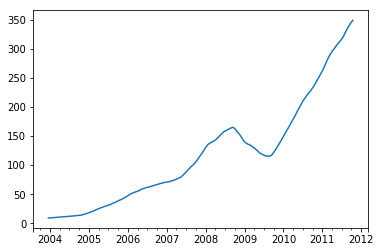

In [81]:
close_px.AAPL.rolling(250).mean().plot()

In [83]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [84]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

In [85]:
expanding_mean = appl_std250.expanding().mean()

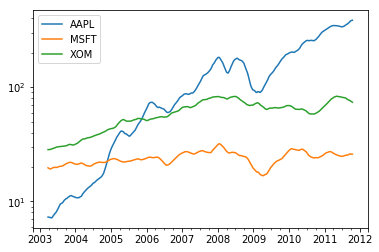

In [86]:
close_px.rolling(60).mean().plot(logy=True)

In [87]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


In [88]:
aapl_px = close_px.AAPL['2006':'2007']

In [89]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [90]:
ewma60 = aapl_px.ewm(span=30).mean()

In [98]:
import matplotlib.pyplot as plt

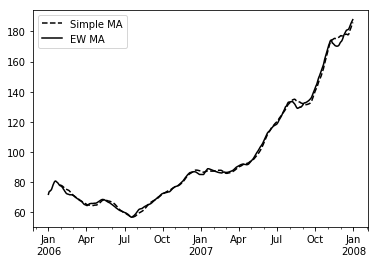

In [99]:
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

In [100]:
spx_px = close_px_all['SPX']

In [101]:
spx_rets = spx_px.pct_change()

In [102]:
returns = close_px.pct_change()

In [103]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

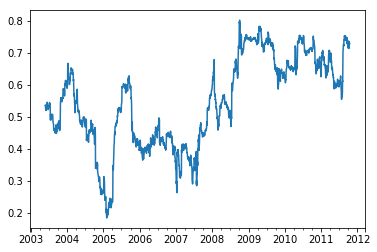

In [104]:
corr.plot()

In [105]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

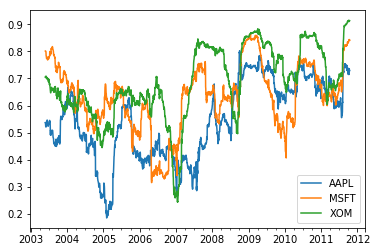

In [106]:
corr.plot()

In [107]:
from scipy.stats import percentileofscore

In [108]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [109]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


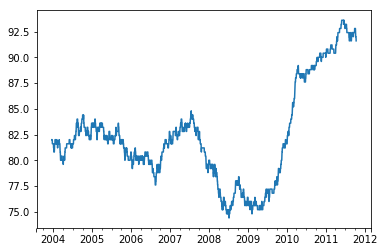

In [110]:
result.plot()

# 8.总结

与前面章节接触的数据相比，时间序列数据要求不同类型的分析和数据转换工
具。 

在接下来的章节中，我们将学习一些高级的 pandas 方法和如何开始使用建模
库 statsmodels 和 scikit-learn。